In [1]:
import pandas as pd
import torch
from sklearn.metrics.pairwise import cosine_similarity
import helpers

#### Resume Dataset

In [2]:
df = pd.read_csv('datasets/Resume.csv')

In [3]:
df

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR
...,...,...,...,...
2479,99416532,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
2480,24589765,"GOVERNMENT RELATIONS, COMMUNICATIONS ...","<div class=""fontsize fontface vmargins hmargin...",AVIATION
2481,31605080,GEEK SQUAD AGENT Professional...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
2482,21190805,PROGRAM DIRECTOR / OFFICE MANAGER ...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION


In [4]:
df.describe()

,ID
count,2.484000e+03
mean,3.182616e+07
std,2.145735e+07
min,3.547447e+06
25%,1.754430e+07
50%,2.521031e+07
75%,3.611444e+07
max,9.980612e+07


In [5]:
df.isna().sum()

ID             0
Resume_str     0
Resume_html    0
Category       0
dtype: int64

In [6]:
df['ID'].nunique()

2484

In [7]:
df['Category'].value_counts()

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
ADVOCATE                  118
CHEF                      118
ENGINEERING               118
ACCOUNTANT                118
FINANCE                   118
FITNESS                   117
AVIATION                  117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

In [8]:
df['Resume_str'].str.len().describe()

count     2484.000000
mean      6295.308776
std       2769.251458
min         21.000000
25%       5160.000000
50%       5886.500000
75%       7227.250000
max      38842.000000
Name: Resume_str, dtype: float64

<Axes: ylabel='Frequency'>

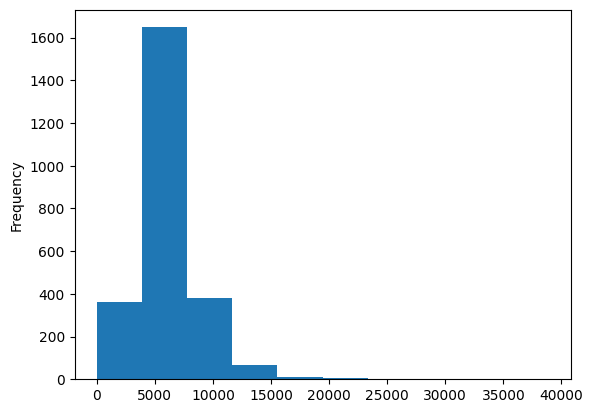

In [9]:
df['Resume_str'].str.len().plot.hist()

In [10]:
df[df['Resume_str'].str.len()==df['Resume_str'].str.len().min()]

,ID,Resume_str,Resume_html,Category
656,12632728,,"<div class=""fontsize fontface vmargins hmargin...",BUSINESS-DEVELOPMENT


In [11]:
print(df['Resume_html'].iloc[0])

<div class="fontsize fontface vmargins hmargins linespacing pagesize" id="document"> <div class="section firstsection" id="SECTION_NAME500375979" style="
      padding-top:0px;
    "> <div class="paragraph PARAGRAPH_NAME firstparagraph" id="PARAGRAPH_500375979_1_326506904" style="
      padding-top:0px;
    "> <div class="name" itemprop="name"> <span class="field fName" id="500375979FNAM1"> </span> <span> </span> <span class="field" id="500375979LNAM1"> HR ADMINISTRATOR/MARKETING ASSOCIATE

HR ADMINISTRATOR</span> </div> </div> </div> <div class="section" id="SECTION_SUMM500375981" style="
      padding-top:0px;
    "> <div class="heading bottomborder"> <div class="sectiontitle" id="SECTNAME_SUMM500375981"> Summary</div> </div> <div class="paragraph firstparagraph" id="PARAGRAPH_500375981_1_326506917" style="
      padding-top:0px;
    "> <div class="field singlecolumn" id="500375981FRFM1"> <p align="LEFT"> Dedicated Customer Service Manager with 15+ years of experience in Hospitality 

#### Tech Resume Dataset

In [12]:
df_ur = pd.read_csv('datasets/UpdatedResumeDataSet.csv')

In [13]:
df_ur

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


#### Tech Job Postings

In [14]:
df_j = pd.read_csv('datasets/dice_com-job_us_sample.csv')

In [15]:
df_j

,advertiserurl,company,employmenttype_jobstatus,jobdescription,jobid,joblocation_address,jobtitle,postdate,shift,site_name,skills,uniq_id
0,https://www.dice.com/jobs/detail/AUTOMATION-TE...,"Digital Intelligence Systems, LLC","C2H Corp-To-Corp, C2H Independent, C2H W2, 3 M...",Looking for Selenium engineers...must have sol...,Dice Id : 10110693,"Atlanta, GA",AUTOMATION TEST ENGINEER,1 hour ago,Telecommuting not available|Travel not required,NaN,SEE BELOW,418ff92580b270ef4e7c14f0ddfc36b4
1,https://www.dice.com/jobs/detail/Information-S...,University of Chicago/IT Services,Full Time,The University of Chicago has a rapidly growin...,Dice Id : 10114469,"Chicago, IL",Information Security Engineer,1 week ago,Telecommuting not available|Travel not required,NaN,"linux/unix, network monitoring, incident respo...",8aec88cba08d53da65ab99cf20f6f9d9
2,https://www.dice.com/jobs/detail/Business-Solu...,"Galaxy Systems, Inc.",Full Time,"GalaxE.SolutionsEvery day, our solutions affec...",Dice Id : CXGALXYS,"Schaumburg, IL",Business Solutions Architect,2 weeks ago,Telecommuting not available|Travel not required,NaN,"Enterprise Solutions Architecture, business in...",46baa1f69ac07779274bcd90b85d9a72
3,https://www.dice.com/jobs/detail/Java-Develope...,TransTech LLC,Full Time,Java DeveloperFull-time/direct-hireBolingbrook...,Dice Id : 10113627,"Bolingbrook, IL","Java Developer (mid level)- FT- GREAT culture,...",2 weeks ago,Telecommuting not available|Travel not required,NaN,Please see job description,3941b2f206ae0f900c4fba4ac0b18719
4,https://www.dice.com/jobs/detail/DevOps-Engine...,Matrix Resources,Full Time,Midtown based high tech firm has an immediate ...,Dice Id : matrixga,"Atlanta, GA",DevOps Engineer,48 minutes ago,Telecommuting not available|Travel not required,NaN,"Configuration Management, Developer, Linux, Ma...",45efa1f6bc65acc32bbbb953a1ed13b7
...,...,...,...,...,...,...,...,...,...,...,...,...
21995,https://www.dice.com/jobs/detail/Web-Designer-...,IAC Publishing,Full Time,Company Description We are searching for a ta...,Dice Id : 10112803,"Oakland, CA",Web Designer,3 weeks ago,Telecommuting not available|Travel not required,NaN,"UI/UX mobile apps, interaction design, digital...",86e27ce6b7e631e55d69d142c7d43df2
21996,https://www.dice.com/jobs/detail/Senior-Front-...,Omega Solutions Inc,Full Time,CONTACT - priya@omegasolutioninc.com / 408-45...,Dice Id : 10289500,"San Francisco, CA",Senior Front End Web Developer - Full Time at ...,3 weeks ago,Telecommuting not available|Travel not required,NaN,"JavaScript, HTML5, CSS3, Bootstrap, AJAX, Reac...",4287c7ee3317ccf1edd76e238cf8e584
21997,https://www.dice.com/jobs/detail/QA-Analyst-Sa...,San Francisco Health Plan,Full Time,Do you take pride in your work knowing that th...,Dice Id : 10115761,"San Francisco, CA",QA Analyst,2 weeks ago,Telecommuting not available|Travel not required,NaN,"SDLC, ALM, SQL, T-SQL, RedGate, Team Foundatio...",d7512f0181d69f83f96db38cd77a4d08
21998,https://www.dice.com/jobs/detail/Tech-Lead%252...,IAC Publishing,Full Time,Company Description What We Can Offer YouAs th...,Dice Id : 10112803,"Oakland, CA",Tech Lead-Full Stack,2 weeks ago,Telecommuting not available|Travel not required,NaN,"Python, Ruby, Go, Clojure, Java, NoSQL-Databas...",ec375268b494b3bcbed1635d64226112


In [16]:
df_j['company'].nunique()

4291

In [17]:
df_j['company'].value_counts()

company
CyberCoders                       335
Amazon                            263
Robert Half                       249
Robert Half Technology            247
U.S. Tech Solutions Inc.          188
                                 ... 
The Bradley Partnerships, Inc.      1
August Consulting Inc               1
Artyllect, Inc.                     1
Oportun, Inc.                       1
SCS                                 1
Name: count, Length: 4291, dtype: int64

In [18]:
df_j['shift'].value_counts()

shift
Telecommuting not available|Travel not required         20305
Telecommuting not available|Travel required to 10%.       314
Telecommuting not available|Travel required to 25%.       305
Telecommuting not available|Travel required to 100%.      193
Telecommuting available|Travel not required               146
Telecommuting not available|Travel required to 50%.       141
Telecommuting not available|Travel required to 75%.        97
Telecommuting available|Travel required to 25%.            41
Telecommuting not available|Travel required to 80%.        28
Telecommuting available|Travel required to 50%.            21
Telecommuting available|Travel required to 75%.            18
Telecommuting available|Travel required to 10%.            11
Telecommuting not available|Travel required to 20%.         5
Telecommuting not available|Travel required to 40%.         4
Telecommuting not available|Travel required to 5%.          4
Telecommuting not available|Travel required to 60%.         3
Te

#### ESCO

In [19]:
esco = pd.read_parquet('processed/esco_skills.parquet')

In [20]:
esco.head(10)

,conceptType,conceptUri,skillType,reuseLevel,preferredLabel,altLabels,hiddenLabels,status,modifiedDate,scopeNote,definition,inScheme,description,embeddings
0,KnowledgeSkillCompetence,http://data.europa.eu/esco/skill/0005c151-5b5a...,skill/competence,sector-specific,manage musical staff,manage staff of music\ncoordinate duties of mu...,None,released,2023-11-30T15:53:37.136Z,None,None,http://data.europa.eu/esco/concept-scheme/skil...,Assign and manage staff tasks in areas such as...,"[-0.054591812, -0.018804703, -0.17031825, -0.0..."
1,KnowledgeSkillCompetence,http://data.europa.eu/esco/skill/00064735-8fad...,skill/competence,occupation-specific,supervise correctional procedures,oversee prison procedures\nmanage correctional...,None,released,2023-11-30T15:04:00.689Z,None,None,http://data.europa.eu/esco/concept-scheme/memb...,Supervise the operations of a correctional fac...,"[0.048651647, 0.023129402, -0.14121306, -0.031..."
2,KnowledgeSkillCompetence,http://data.europa.eu/esco/skill/000709ed-2be5...,skill/competence,sector-specific,apply anti-oppressive practices,apply non-oppressive practices\napply an anti-...,None,released,2023-11-28T10:45:53.54Z,None,None,http://data.europa.eu/esco/concept-scheme/skil...,"Identify oppression in societies, economies, c...","[0.042062778, 0.018910391, -0.16224517, -0.035..."
3,KnowledgeSkillCompetence,http://data.europa.eu/esco/skill/0007bdc2-dd15...,skill/competence,sector-specific,control compliance of railway vehicles regulat...,monitoring of compliance with railway vehicles...,None,released,2023-11-30T16:29:18.273Z,None,None,http://data.europa.eu/esco/concept-scheme/skil...,"Inspect rolling stock, components and systems ...","[-0.020243065, -0.01827101, -0.17690042, 0.008..."
4,KnowledgeSkillCompetence,http://data.europa.eu/esco/skill/00090cc1-1f27...,skill/competence,cross-sector,identify available services,establish available services\ndetermine rehabi...,None,released,2023-11-28T10:38:49.206Z,None,None,http://data.europa.eu/esco/concept-scheme/memb...,Identify the different services available for ...,"[-0.069251984, -0.0001897157, -0.15665601, -0...."
5,KnowledgeSkillCompetence,http://data.europa.eu/esco/skill/000bb1e4-89f0...,skill/competence,cross-sector,perform toxicological studies,apply toxicological testing methods\nperform t...,None,released,2023-11-30T15:10:42.752Z,None,None,http://data.europa.eu/esco/concept-scheme/skil...,Perform tests to detect poisons or drug misuse...,"[0.019682756, 0.012518696, -0.14906338, -0.024..."
6,KnowledgeSkillCompetence,http://data.europa.eu/esco/skill/000c94d2-2a2e...,skill/competence,occupation-specific,ensure coquille uniformity,ensure uniformity of coquille\nchecking that c...,None,released,2023-11-30T16:49:26.078Z,None,None,http://data.europa.eu/esco/concept-scheme/skil...,Oversee uniformity of coquilles; use casting e...,"[-0.003075477, 0.04419442, -0.19392519, -0.082..."
7,KnowledgeSkillCompetence,http://data.europa.eu/esco/skill/000f1d3d-220f...,knowledge,sector-specific,Haskell,Haskell techniques,None,released,2023-11-30T16:13:21.77Z,None,None,http://data.europa.eu/esco/concept-scheme/memb...,The techniques and principles of software deve...,"[-0.006306637, 0.06226282, -0.10247465, -0.100..."
8,KnowledgeSkillCompetence,http://data.europa.eu/esco/skill/001115fb-569f...,skill/competence,transversal,show initiative,take the initiative\ngive impetus\nbe a drivin...,activity\nactive participation\nself starter\n...,released,2021-09-02T16:37:00.315Z,None,None,http://data.europa.eu/esco/concept-scheme/skil...,Be proactive and take the first step in an act...,"[-0.051348966, 0.076332, -0.19071895, -0.03992..."
9,KnowledgeSkillCompetence,http://data.europa.eu/esco/skill/001d46db-035e...,skill/competence,sector-specific,train staff to reduce food waste,teach students food waste reduction practices\...,None,released,2021-01-20T14:31:01.524Z,None,None,http://data.europa.eu/esco/concept-scheme/memb...,Establish new trainings and staff development ...,

In [21]:
esco['embeddings']

0        [-0.054591812, -0.018804703, -0.17031825, -0.0...
1        [0.048651647, 0.023129402, -0.14121306, -0.031...
2        [0.042062778, 0.018910391, -0.16224517, -0.035...
3        [-0.020243065, -0.01827101, -0.17690042, 0.008...
4        [-0.069251984, -0.0001897157, -0.15665601, -0....
                               ...                        
13934    [-0.01614617, 0.00750463, -0.18048497, -0.0251...
13935    [-0.049296044, 0.03540551, -0.18445863, -0.021...
13936    [0.026312111, 0.021747442, -0.11412781, -0.073...
13937    [-0.009615241, 0.0053697606, -0.16515373, -0.0...
13938    [0.005949474, 0.06837154, -0.19821174, 0.03050...
Name: embeddings, Length: 13939, dtype: object

In [22]:
embeddings = esco['embeddings'].tolist()

In [36]:
embedding = helpers.get_embedding('written')

In [37]:
embedding['embedding']

[0.2565560042858124,
 -0.5462266802787781,
 -4.1908860206604,
 -0.9790133237838745,
 1.5902864933013916,
 -0.4380711019039154,
 0.0630003958940506,
 0.36794471740722656,
 -0.987740159034729,
 -1.1158427000045776,
 -0.25951704382896423,
 0.8967182636260986,
 2.2273824214935303,
 0.6487407684326172,
 0.5704850554466248,
 -0.3204570412635803,
 0.9167582392692566,
 -0.7318710088729858,
 -0.6626428961753845,
 0.5041536688804626,
 0.2189968228340149,
 -0.7618290781974792,
 -0.5791751146316528,
 0.7545725107192993,
 3.6231765747070312,
 0.1650141477584839,
 -0.9861928224563599,
 -0.8708542585372925,
 -1.0805083513259888,
 0.04347990080714226,
 1.0147532224655151,
 -0.5909093618392944,
 -0.8644886016845703,
 0.11256328225135803,
 -1.4513766765594482,
 -1.6802918910980225,
 -0.60408616065979,
 -0.519353449344635,
 -0.3433763086795807,
 -0.9338123798370361,
 1.8324817419052124,
 -0.33619675040245056,
 -1.457148551940918,
 -0.5700505971908569,
 0.9734397530555725,
 -1.4081791639328003,
 0.8885310

In [38]:
match = cosine_similarity([embedding['embedding']], embeddings)

In [39]:
match.max()

np.float64(0.7481474500990379)

In [40]:
match.argmax()

np.int64(3151)

In [41]:
esco['preferredLabel'].iloc[match.argmax()]

'write English'

In [28]:
esco[esco['preferredLabel'].str.contains('Python')]

,conceptType,conceptUri,skillType,reuseLevel,preferredLabel,altLabels,hiddenLabels,status,modifiedDate,scopeNote,definition,inScheme,description,embeddings
11149,KnowledgeSkillCompetence,http://data.europa.eu/esco/skill/ccd0a1d9-afda...,knowledge,sector-specific,Python (computer programming),Python 3K\nPython,Python 3K,released,2024-02-09T17:29:12.215Z,None,None,http://data.europa.eu/esco/concept-scheme/skil...,The techniques and principles of software deve...,"[-0.0050054025, 0.07292455, -0.114440955, -0.0..."


In [29]:
esco['preferredLabel'].nunique()

13939